<h1>Lesson 5. Model selection: US Salary Prediction</h1>

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/White_House_lawn_%281%29.tif/lossy-page1-2433px-White_House_lawn_%281%29.tif.jpg style="height:300px;">
  
<p>In this exercise you will use the US Adult Census data relating income to social factors such as Age, Education, race etc...</p>

<p>The goal here is to train a binary classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.</p>


In [34]:
import matplotlib.pyplot as plt

In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split


train=pd.read_csv('census-training.csv')
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
Age              48842 non-null int64
EducationNum     48842 non-null int64
MaritalStatus    48842 non-null object
Occupation       48842 non-null object
Relationship     48842 non-null object
Race             48842 non-null object
Gender           48842 non-null object
Hours/Week       48842 non-null int64
Country          48842 non-null object
Income           48842 non-null object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB
None


,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K.


<h3>Q.1. Write a command that will calculate the number of unique values for each feature in the training data.</h3>

In [11]:
train.nunique()

Age              74
EducationNum     16
MaritalStatus     7
Occupation       15
Relationship      6
Race              5
Gender            2
Hours/Week       96
Country          42
Income            4
dtype: int64

<h3>Q.2. There is a special character '?' inserted in the data in place of null values.  Write a command that will remove it and replace with NaN.</h3>

In [12]:
# Command (s): remove the '?' special character and replace with NaN
train.replace("?", np.NaN, inplace=True)
print(train.isnull().sum()) #checking the dataset for NaN values .... NaN values in two columns

Age                 0
EducationNum        0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
Gender              0
Hours/Week          0
Country           857
Income              0
dtype: int64


<h3>Q.3. Replace all missing values in Occupation and Country by their mode (most occuring values). </h3>

In [13]:
#Command(s):
modes = train.mode() # finding mode to compute the most occuring item in every column
#replace missing values with their mode

train["Occupation"] = train["Occupation"].fillna(modes["Occupation"].values[0])
train["Country"] = train["Country"].fillna(modes["Country"].values[0])

print("Mode Occupation:  " + modes["Occupation"].values[0])
print("Mode Country:  " + modes["Country"].values[0])

train.isnull().sum() #checking the data for NaN values .... should all show 0 now

Mode Occupation:  Prof-specialty
Mode Country:  United-States


Age              0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
Hours/Week       0
Country          0
Income           0
dtype: int64

<h3>Q.4. Write functions to replace Gender and Income attributes to "0" and "1". </h3>

In [14]:
train.head()

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K.


In [15]:
# converting Gender to "0" and "1" 
def gender_to_numeric(x):
    #TODO return 1 f gender is Male, 0 otherwise
    return 1 if x == "Male" else 0 

def income_to_numeric(x):
    #TODO return 1 f income is greater than 50k, 0 otherwise
    return 1 if x == ">50K." else 0

train["Gender"] = train["Gender"].apply(lambda x: gender_to_numeric(x))
train["Income"] = train["Income"].apply(lambda x: income_to_numeric(x))

#income_to_numeric(train["Income"])

    
#train['Gender'] = #TODO apply the function to this column

# converting Inccome to "0" and "1" 
#   
#train['Income'] = #TODO apply the function to this column

train.head()

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,1,40,United-States,0
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,1,50,United-States,0
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,1,40,United-States,1
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,40,United-States,1
4,18,10,Never-married,Prof-specialty,Own-child,White,0,30,United-States,0


<h3>Q.5. Use the label encoder API to encode all object-type in the data. </h3>

In [16]:
train_backup = train


In [17]:
# Command(s) 
obj = train.select_dtypes(include=['object']) #all features that are 'object' datatypes
le = preprocessing.LabelEncoder()
i = 0

for i in range(len(obj.columns)):   
    print("processing " + obj.columns[i])
    le.fit(train[obj.columns[i]])
    train[obj.columns[i]] = le.transform(train[obj.columns[i]])
    
train.head(10) #Inspect the data, all features should be numeric now

processing MaritalStatus
processing Occupation
processing Relationship
processing Race
processing Country


,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,4,6,3,2,1,40,38,0
1,38,9,2,4,0,4,1,50,38,0
2,28,12,2,10,0,4,1,40,38,1
3,44,10,2,6,0,2,1,40,38,1
4,18,10,4,9,3,4,0,30,38,0
5,34,6,4,7,1,4,1,30,38,0
6,29,9,4,9,4,2,1,40,38,0
7,63,15,2,9,0,4,1,32,38,1
8,24,10,4,7,4,4,0,40,38,0
9,55,4,2,2,0,4,1,10,38,0


<h3>Q.6. Split the data into 70% training and 30% test </h3>

In [18]:
x_train, x_test, y_train, y_test = train_test_split(train.iloc[:,:-1].values,train.iloc[:,9:].values, test_size=.30, random_state=314)

In [22]:
# confirming that the shapes are consistent with the desiured split
print(train.shape)
print(x_train.shape)
print(x_test.shape)

(48842, 10)
(34189, 9)
(14653, 9)


<h3>Q.7. Train the logistic regression model on the train dataset and evaluate its performance on the test dataset.</p>

In [38]:
#Initialize classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

#TODO Initialize logistic regression classifier
# TODO: fit X_train and y_trainlog_rgr = LogisticRegression()
log_rgr = LogisticRegression(solver="lbfgs",max_iter=1000)
log_rgr.fit(x_train, y_train.ravel())

#check performance against training data
y_pred_train= log_rgr.predict(x_train)

#predict on the test set
y_pred = log_rgr.predict(x_test)

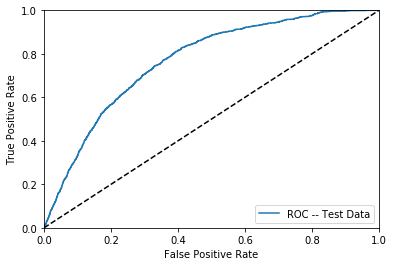

In [40]:
#get roc and auc information
log_rgr_score_test = log_rgr.predict_proba(x_test)[:,1]
fpr_tst, tpr_tst, _ = roc_curve(y_test,log_rgr_score_test)

plt.plot(fpr_tst, tpr_tst, label="ROC -- Test Data")
plt.plot([0,1], [0,1], c="black", ls="--")
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [42]:
print("AUC on test data:" + str(round(auc(fpr_tst, tpr_tst),3)))

AUC on test data:0.768


In [30]:
print("Confusion matrix:\n" + str(confusion_matrix(y_train, y_pred_train)))
print("Accuracy:\n "+str(accuracy_score(y_train, y_pred_train)))

Confusion matrix:
[[31441    10]
 [ 2736     2]]
Accuracy:
 0.9196817689900261


In [28]:
print("Confusion matrix:\n" + str(confusion_matrix(y_test, y_pred)))
print("Accuracy:\n "+str(accuracy_score(y_test, y_pred)))

Confusion matrix:
[[13541     4]
 [ 1105     3]]
Accuracy:
 0.9243158397597762


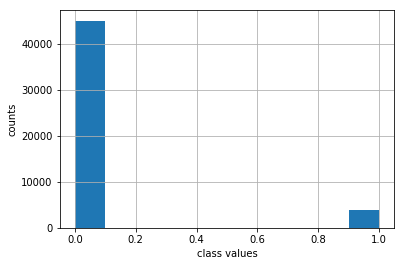

In [37]:
train["Income"].hist()
plt.xlabel("class values")
plt.ylabel("counts")
plt.show()

The model shows as having a high accuracy rate, however, this mainly stems from the class imbalance of the datasets.  Given that one population is so large, even a model that just predicts class = 0 (income <= 50K) with no other information would have a very high accuracy rate. The AUC metric bares that out a bit more with the value of .78, showing that the model is accurate, but, it takes into acount the error of false positives.  

<h3>Q.8. Train the KNN classifier (with k=15) on the train dataset and evaluate its performance on the test dataset. Compare your results with the one above</p>

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
#from sklearn.neighbors import KNeighborsClassifier

#Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=15) #Initialize KNN classifier with k=15
knn.fit(x_train, y_train.ravel()) #fit X_train and y_train


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

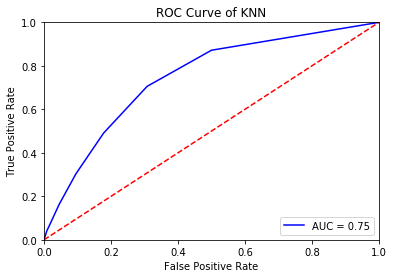

In [57]:
knn_y_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, knn_y_pred)  #Compute the accuracy score

knn_score_test = knn.predict_proba(x_test)[:,1]
fpr_tst_knn, tpr_tst_knn, thresholds = roc_curve(y_test, knn_score_test)

knn_roc_auc = auc(fpr_tst_knn, tpr_tst_knn)

plt.title("ROC Curve of KNN")
plt.plot(fpr_tst_knn, tpr_tst_knn, 'b', label = 'AUC = %0.2f' % knn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, knn_y_pred)))
print("Accuracy: {}".format(knn_acc))
print("AUC: {}".format(knn_roc_auc))

Confusion Matrix:
 [[13513    32]
 [ 1095    13]]
Accuracy: 0.9230874223708455
AUC: 0.7457502601969901


The results are comparable to the previous results of the logistic regression.  Both models achieve approximately the same accuracy as well as have the same AUC values.  As such, the knn model doesn't offer a particularly compelling reason to use it over the logit model from a performance perspective.  

<h3>Q.9. Perform recursive feature elimination (5 features) on the dataset using the logistic regression classifier. Any difference in the results? Explain.</h3>

In [54]:
from sklearn.feature_selection import RFE
log_rgr_backup = log_rgr

In [67]:
rfe =  RFE(LogisticRegression(solver = "lbfgs",max_iter=1000), 5)
fit = rfe.fit(x_train, y_train.ravel())

In [80]:
y_pred_rfe = fit.predict(x_test)
rfe_lr_acc = accuracy_score(y_test, y_pred_rfe)
log_rgr_rfe_score = fit.predict_proba(x_test)[:,1]
fpr_tst_rfe, tpr_tst_rfe, _ = roc_curve(y_test,log_rgr_rfe_score)
rfe_roc_auc = auc(fpr_tst_rfe, tpr_tst_rfe)

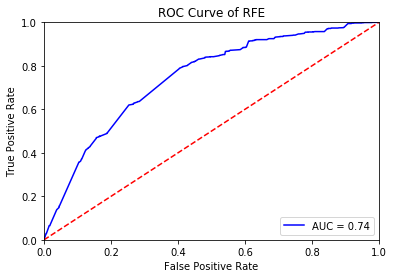

In [82]:
plt.title("ROC Curve of RFE")
plt.plot(fpr_tst_rfe, tpr_tst_rfe, 'b', label = 'AUC = %0.2f' % rfe_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
print("Accuracy: {}".format(rfe_lr_acc))
print("AUC: {}".format(rfe_roc_auc))

Accuracy: 0.9243840851702723
AUC: 0.7443993347485918


The model generated from the RFE is still very comparable to the other models.  What this implies is that though the best performing features were kept, the extraneous features did not significantly impact the accuracy of the model overall.  Again, a major issue with this approach is not trying to address the high class imbalance